# EDA short version

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
dfLinks = pd.read_csv('data/links.csv',nrows=5)
dfLinks

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [29]:
del dfLinks

In [30]:
dfMovies = pd.read_csv('data/movies.csv',nrows=5)
dfMovies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
dfRatings = pd.read_csv('data/ratings.csv', nrows=5)
dfRatings

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [32]:
dfTags = pd.read_csv('data/tags.csv',nrows=5)
dfTags

,userId,movieId,tag,timestamp
0,19,2324,bittersweet,1428651158
1,19,2324,holocaust,1428651112
2,19,2324,World War II,1428651118
3,23,7075,hilarious,1378675786
4,23,7075,Underrated,1378675786


Cleaning and ordering data

In [33]:
dfMovies = pd.read_csv('data/movies.csv')
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


In [34]:
dfMovies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34203,151697,Grand Slam (1967),Thriller
34204,151701,Bloodmoney (2010),(no genres listed)
34205,151703,The Butterfly Circus (2009),Drama
34206,151709,Zero (2015),Drama|Sci-Fi


In [35]:
df = dfMovies['title'].str.split(r'(\(\d\d\d\d\)$)',expand=True) \
    .rename(columns={0: 'title', 1: 'year'}) \
    .drop(columns=[2]) \
    .dropna()

df['year'] = df['year'].str.strip('()')

dfMovies = pd.concat([df[['title', 'year']], dfMovies[['movieId', 'genres']]], axis=1) \
    .rename(columns={'movieId': 'movie_id'}) \
    .set_index('movie_id')


dfMovies['genres'] = dfMovies['genres'].str.lower() \
    .str.split('|') \
    .apply(lambda x: set(x).remove('(no genres listed)') if '(no genres listed)' in x else set(x))

dfMovies = dfMovies.dropna(subset=['title', 'year'])
dfMovies['year'] = dfMovies['year'].astype(int)
dfMovies['title'] = dfMovies['title'].str.strip().str.lower()

dfMovies

,title,year,genres
movie_id,,,
1,toy story,1995,"{fantasy, animation, comedy, children, adventure}"
2,jumanji,1995,"{fantasy, adventure, children}"
3,grumpier old men,1995,"{romance, comedy}"
4,waiting to exhale,1995,"{romance, drama, comedy}"
5,father of the bride part ii,1995,{comedy}
...,...,...,...
151697,grand slam,1967,{thriller}
151701,bloodmoney,2010,None
151703,the butterfly circus,2009,{drama}


In [36]:
dfMovies['title'].iloc[0]

'toy story'

In [37]:
dfRatings = pd.read_csv('data/ratings.csv', usecols=['movieId', 'userId', 'rating'])
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 523.8 MB


In [38]:
dfRatings = dfRatings.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'})

# change the data formats to save resources - decrease memory usage
dfRatings['user_id'] = dfRatings['user_id'].astype(np.uint32)
dfRatings['movie_id'] = dfRatings['movie_id'].astype(np.uint32)
dfRatings['rating'] = dfRatings['rating'].astype(np.float16)

dfRatings = dfRatings.drop_duplicates(subset=('user_id', 'movie_id'))
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22884377 entries, 0 to 22884376
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   uint32 
 1   movie_id  uint32 
 2   rating    float16
dtypes: float16(1), uint32(2)
memory usage: 392.8 MB


In [39]:
# cleaning and data conversion to save memory of the tags source
dfTags = pd.read_csv('data/tags.csv', usecols=['userId', 'movieId', 'tag']) \
.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'})
dfTags['movie_id'] = dfTags['movie_id'].astype(np.uint32)
dfTags['user_id'] = dfTags['user_id'].astype(np.uint32)
dfTags['tag'] = dfTags['tag'].str.lower().str.strip()
dfTags = dfTags.dropna().drop_duplicates()

dfTags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586978 entries, 0 to 586993
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   586978 non-null  uint32
 1   movie_id  586978 non-null  uint32
 2   tag       586978 non-null  object
dtypes: object(1), uint32(2)
memory usage: 13.4+ MB


array([[<AxesSubplot:title={'center':'movie_id'}>]], dtype=object)

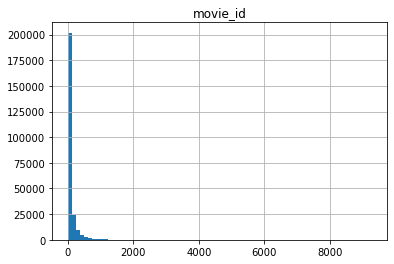

In [40]:
# data evalution from model creation perpsectivie
# rating distribution
dfRatings[['movie_id','user_id']].groupby(by='user_id').count().hist(bins=75)

array([[<AxesSubplot:title={'center':'user_id'}>]], dtype=object)

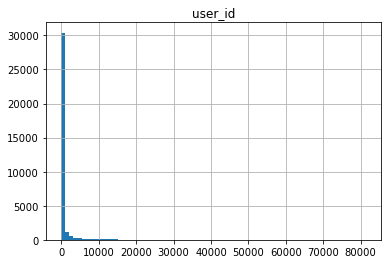

In [41]:
dfRatings[['movie_id','user_id']].groupby(by='movie_id').count().hist(bins=75)

In [42]:
# lets see the most popular movies
dfRatings[['movie_id', 'user_id']].groupby(by='movie_id') \
    .count() \
    .rename(columns={'user_id': 'views'}) \
    .sort_values(by='views', ascending=False) \
    .merge(dfMovies, left_on='movie_id', right_index=True) \
    .head(15)

,views,title,year,genres
movie_id,,,,
356,81296,forrest gump,1994,"{romance, drama, comedy, war}"
296,79091,pulp fiction,1994,"{thriller, crime, drama, comedy}"
318,77887,"shawshank redemption, the",1994,"{drama, crime}"
593,76271,"silence of the lambs, the",1991,"{horror, thriller, crime}"
480,69545,jurassic park,1993,"{sci-fi, adventure, thriller, action}"
260,67092,star wars: episode iv - a new hope,1977,"{sci-fi, adventure, action}"
2571,64830,"matrix, the",1999,"{sci-fi, thriller, action}"
110,61267,braveheart,1995,"{war, drama, action}"
1,60424,toy story,1995,"{fantasy, animation, comedy, children, adventure}"


In [43]:
# how the movies were rated: the best
dfRatings[['movie_id', 'rating']].groupby(by='movie_id') \
    .mean() \
    .rename(columns={'rating': 'average_rating'}) \
    .sort_values(by='average_rating', ascending=False) \
    .merge(dfMovies, left_on='movie_id', right_index=True) \
    .head(15)

,average_rating,title,year,genres
movie_id,,,,
140431,5.0,the biscuit eater,1940,None
137052,5.0,a job to kill for,2006,"{thriller, drama}"
137048,5.0,perfect child,2007,{drama}
146433,5.0,big love,2012,"{romance, thriller, drama}"
137046,5.0,the perfect assistant,2008,"{mystery, thriller, crime}"
106113,5.0,such hawks such hounds,2008,{documentary}
106115,5.0,"story of science, the",2010,{documentary}
137040,5.0,hunger point,2003,{drama}
137038,5.0,the perfect wife,2001,"{thriller, drama}"


In [44]:
# how the movies were rated: the worst
dfRatings[['movie_id', 'rating']].groupby(by='movie_id') \
    .mean() \
    .rename(columns={'rating': 'average_rating'}) \
    .sort_values(by='average_rating', ascending=False) \
    .merge(dfMovies, left_on='movie_id', right_index=True) \
    .tail(15)

,average_rating,title,year,genres
movie_id,,,,
138576,0.5,brutal,2012,{crime}
79561,0.5,dr. moreau's house of pain,2004,{horror}
128677,0.5,zeder,1983,{horror}
146246,0.5,bhai,1997,None
131688,0.5,girlfriend from hell,1989,"{horror, comedy}"
138442,0.5,noi credevamo,2010,None
133407,0.5,dirty business,2009,{documentary}
135545,0.5,ardennes fury,2014,"{war, action}"
99667,0.5,excuse me for living,2012,"{romance, comedy}"


In [45]:
dfMoviesStats = dfRatings[['movie_id', 'user_id', 'rating']].groupby(by='movie_id') \
    .agg({'user_id': 'count', 'rating': 'mean'}) \
    .rename(columns={'user_id': 'views_count', 'rating': 'average_rating'}) \
    .sort_values(by='views_count', ascending=False) \
    .merge(dfMovies, left_on='movie_id', right_index=True)

dfMoviesStats.head(15)

,views_count,average_rating,title,year,genres
movie_id,,,,,
356,81296,4.046875,forrest gump,1994,"{romance, drama, comedy, war}"
296,79091,4.164062,pulp fiction,1994,"{thriller, crime, drama, comedy}"
318,77887,4.441406,"shawshank redemption, the",1994,"{drama, crime}"
593,76271,4.160156,"silence of the lambs, the",1991,"{horror, thriller, crime}"
480,69545,3.652344,jurassic park,1993,"{sci-fi, adventure, thriller, action}"
260,67092,4.156250,star wars: episode iv - a new hope,1977,"{sci-fi, adventure, action}"
2571,64830,4.171875,"matrix, the",1999,"{sci-fi, thriller, action}"
110,61267,4.035156,braveheart,1995,"{war, drama, action}"
1,60424,3.894531,toy story,1995,"{fantasy, animation, comedy, children, adventure}"


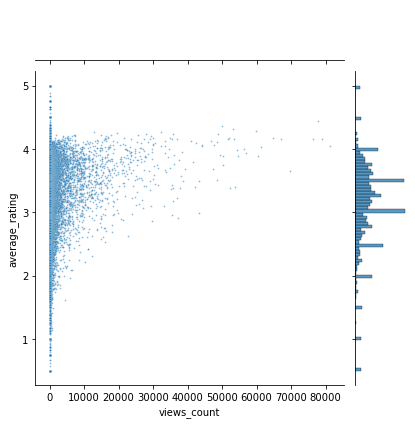

In [46]:
sns.jointplot(data=dfMoviesStats, x='views_count', y='average_rating', alpha=0.5, s=3.0)

In [47]:
# users preferences to rate the movies
dfUserCount = pd.DataFrame(dfRatings['user_id'].value_counts()) \
    .reset_index() \
    .rename(columns={'index': 'user_id', 'user_id': 'count'})

dfUserCount

,user_id,count
0,185430,9281
1,46750,7515
2,204165,7057
3,135877,6015
4,58040,5801
...,...,...
247748,127573,1
247749,180933,1
247750,200783,1
247751,180936,1


In [48]:
len(dfRatings)

22884377

In [49]:
# data set reduction to movies displayed at least 2000 times

MIN_VIEWS_FOR_MOVIES = 2000
movieIds = list(dfMoviesStats[dfMoviesStats['views_count'] > MIN_VIEWS_FOR_MOVIES].index)
print("# movies:", len(movieIds))

# movies: 2217


In [50]:
# same exerciese but with users - limit data size
MIN_RATINGS_FROM_USERS = 1000
userIds = dfUserCount[dfUserCount['count'] > MIN_RATINGS_FROM_USERS]['user_id'].tolist()
print("# users:", len(userIds))

# users: 2109


In [51]:
print(len(dfRatings))
df = dfRatings[dfRatings.reset_index()['movie_id'].isin(movieIds)]
print(len(df))
df = df[df['user_id'].isin(userIds)]
print(len(df))

df = df.reset_index()
df

22884377
18779638
1905979


,index,user_id,movie_id,rating
0,1247,17,1,5.0
1,1248,17,2,3.0
2,1249,17,3,2.0
3,1250,17,4,3.0
4,1251,17,5,4.0
...,...,...,...,...
1905974,22877349,247662,109487,4.0
1905975,22877351,247662,112852,4.0
1905976,22877356,247662,116823,3.0
1905977,22877358,247662,119145,3.5


In [52]:
df['rating'].min()

0.5

In [53]:
df['rating'].max()

5.0

In [54]:
df = df[['user_id', 'movie_id', 'rating']].groupby(by=['movie_id', 'user_id']) \
.mean() \
.reset_index() \
.dropna()
df

,movie_id,user_id,rating
0,1,17,5.0
1,1,106,2.5
2,1,373,4.0
3,1,670,5.0
4,1,707,4.0
...,...,...,...
1905974,134853,244116,4.5
1905975,134853,244606,3.0
1905976,134853,246481,4.0
1905977,134853,246533,2.5


In [55]:
ddf = pd.DataFrame(df.to_numpy(), columns=['movie_id', 'user_id', 'rating'])
ddf['movie_id'] = ddf['movie_id'].astype(int)
ddf['user_id'] = ddf['user_id'].astype(int)
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905979 entries, 0 to 1905978
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   movie_id  int32  
 1   user_id   int32  
 2   rating    float64
dtypes: float64(1), int32(2)
memory usage: 29.1 MB


In [56]:
Y = ddf.pivot(index='user_id', columns='movie_id', values='rating')
Y

movie_id,1,2,3,4,5,6,7,9,10,11,...,115617,115713,116797,116823,119145,122882,122886,122892,134130,134853
user_id,,,,,,,,,,,,,,,,,,,,,
17,5.0,3.0,2.0,3.0,4.0,NaN,3.0,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,2.5,3.0,NaN,NaN,NaN,3.5,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,4.0,1.5,2.0,NaN,2.5,3.5,3.5,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,NaN,0.5,2.5,2.5,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,5.0,4.0,1.5,NaN,3.0,4.0,NaN,NaN,3.5,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247424,4.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247438,3.5,3.0,NaN,2.5,NaN,3.5,NaN,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247509,4.5,3.5,3.5,NaN,NaN,NaN,NaN,NaN,3.5,4.0,...,3.0,1.5,NaN,NaN,3.0,NaN,1.5,2.5,3.0,3.5


In [57]:
# to present if a specific movie was rated by user
Y > 0

movie_id,1,2,3,4,5,6,7,9,10,11,...,115617,115713,116797,116823,119145,122882,122886,122892,134130,134853
user_id,,,,,,,,,,,,,,,,,,,,,
17,True,True,True,True,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
106,True,True,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
373,True,True,True,False,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
402,False,False,False,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
670,True,True,True,False,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247424,True,False,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
247438,True,True,False,True,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
247509,True,True,True,False,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,True,True


In [58]:
# save data to pickle format
dfRatings.to_pickle('data/ratings.pkl')
dfMovies.to_pickle('data/movies.pkl')
ddf.to_pickle('data/user-movie-data-clean.pkl')
Y.to_pickle('data/Y.pkl')

# First recommendation system

In [59]:
import numpy as np
import pandas as pd

In [60]:
dfRatings = pd.read_pickle('data/ratings.pkl')
dfMovies = pd.read_pickle('data/movies.pkl')
Y = pd.read_pickle('data/Y.pkl')

In [61]:
dfRatings.head()

,user_id,movie_id,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


In [62]:
dfMovies.head()

,title,year,genres
movie_id,,,
1,toy story,1995,"{fantasy, animation, children, comedy, adventure}"
2,jumanji,1995,"{children, fantasy, adventure}"
3,grumpier old men,1995,"{romance, comedy}"
4,waiting to exhale,1995,"{romance, drama, comedy}"
5,father of the bride part ii,1995,{comedy}


In [63]:
Y.head()

movie_id,1,2,3,4,5,6,7,9,10,11,...,115617,115713,116797,116823,119145,122882,122886,122892,134130,134853
user_id,,,,,,,,,,,,,,,,,,,,,
17,5.0,3.0,2.0,3.0,4.0,NaN,3.0,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,2.5,3.0,NaN,NaN,NaN,3.5,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,4.0,1.5,2.0,NaN,2.5,3.5,3.5,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,NaN,0.5,2.5,2.5,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,5.0,4.0,1.5,NaN,3.0,4.0,NaN,NaN,3.5,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
title = 'Toy Story'
dfMovies[dfMovies['title'] == title.lower()].index[0]

1

In [65]:
def get_index(Y, df, title):
    if title.lower() in tuple(dfMovies['title']):
        movie_index = dfMovies[dfMovies['title'] == title.lower()].index[0]
        if movie_index in Y.columns:
            return movie_index
        else:
            raise(ValueError(f'Movie index: {movie_index} does not exist'))
    else:
        raise(ValueError(f'Movie: "{title}" not found!'))

In [66]:
# lets see if function works
# positive scenario
get_index(Y, dfMovies, 'Jumanji')

2

In [67]:
# positive scenario
get_index(Y, dfMovies, 'Forrest Gump')

356

In [68]:
# negative scenario
get_index(Y, dfMovies, 'Fake movie title')

ValueError: Movie: "Fake movie title" not found!

In [69]:
movieIndex = get_index(Y, dfMovies, 'Forrest Gump')
Y.corrwith(Y[movieIndex])

movie_id
1         0.226102
2         0.273376
3         0.310216
4         0.128658
5         0.307020
            ...   
122882    0.059550
122886    0.256877
122892    0.238609
134130    0.240300
134853    0.201823
Length: 2217, dtype: float64

In [70]:
# clean the list
Y.corrwith(Y[movieIndex]) \
    .dropna() \
    .sort_values(ascending=False) \
    .head()

movie_id
356     1.000000
110     0.450801
1961    0.441545
590     0.428735
3147    0.426190
dtype: float64

In [71]:
pd.DataFrame(Y.corrwith(Y[movieIndex]) \
    .dropna() \
    .sort_values(ascending=False) \
    .head()) \
    .join(dfMovies)

,0,title,year,genres
movie_id,,,,
356,1.000000,forrest gump,1994,"{romance, drama, comedy, war}"
110,0.450801,braveheart,1995,"{war, drama, action}"
1961,0.441545,rain man,1988,{drama}
590,0.428735,dances with wolves,1990,"{western, adventure, drama}"
3147,0.426190,"green mile, the",1999,"{drama, crime}"


In [72]:
def get_recommendation(Y, dfMovies, title, n_suggestions=5):
    movieIndex = get_index(Y, dfMovies, title)
    suggestions = pd.DataFrame(Y.corrwith(Y[movieIndex])) \
        .dropna() \
        .sort_values(by=0, ascending=False) \
        .iloc[1:n_suggestions + 1] \
        .join(dfMovies) \
        .rename(columns={0: 'correlation'})
    
    return suggestions

In [73]:
# lets see is it working
get_recommendation(Y, dfMovies, 'Toy Story', n_suggestions=7)

,correlation,title,year,genres
movie_id,,,,
3114,0.756428,toy story 2,1999,"{fantasy, animation, children, comedy, adventure}"
78499,0.618795,toy story 3,2010,"{fantasy, animation, children, comedy, adventu..."
2355,0.575283,"bug's life, a",1998,"{children, animation, adventure, comedy}"
6377,0.562309,finding nemo,2003,"{children, animation, adventure, comedy}"
4886,0.525836,"monsters, inc.",2001,"{fantasy, animation, children, comedy, adventure}"
595,0.516899,beauty and the beast,1991,"{romance, musical, fantasy, animation, childre..."
588,0.515730,aladdin,1992,"{musical, animation, children, comedy, adventure}"


In [74]:
# lets check for other movie
get_recommendation(Y, dfMovies, 'Apollo 13', n_suggestions=7)

,correlation,title,year,genres
movie_id,,,,
2028,0.451545,saving private ryan,1998,"{war, drama, action}"
3035,0.445475,mister roberts,1955,"{war, drama, comedy}"
33660,0.440269,cinderella man,2005,"{romance, drama}"
2797,0.435442,big,1988,"{romance, fantasy, drama, comedy}"
1608,0.425555,air force one,1997,"{thriller, action}"
3157,0.423442,stuart little,1999,"{children, fantasy, comedy}"
381,0.423400,when a man loves a woman,1994,"{romance, drama}"


In [75]:
get_recommendation(Y, dfMovies, 'Goldeneye', n_suggestions=7)

,correlation,title,year,genres
movie_id,,,,
1722,0.638308,tomorrow never dies,1997,"{thriller, adventure, action}"
3082,0.597178,"world is not enough, the",1999,"{thriller, adventure, action}"
3639,0.546179,"man with the golden gun, the",1974,"{thriller, adventure, action}"
2989,0.540231,for your eyes only,1981,"{thriller, adventure, action}"
3635,0.526271,"spy who loved me, the",1977,"{thriller, adventure, action}"
2990,0.518172,licence to kill,1989,"{thriller, adventure, action}"
2376,0.515580,"view to a kill, a",1985,"{thriller, adventure, action}"


In [76]:
# and star wars
dfMovies[dfMovies['title'].str.contains('star wars')]

,title,year,genres
movie_id,,,
260,star wars: episode iv - a new hope,1977,"{sci-fi, adventure, action}"
1196,star wars: episode v - the empire strikes back,1980,"{sci-fi, adventure, action}"
1210,star wars: episode vi - return of the jedi,1983,"{sci-fi, adventure, action}"
2628,star wars: episode i - the phantom menace,1999,"{sci-fi, adventure, action}"
5378,star wars: episode ii - attack of the clones,2002,"{imax, sci-fi, adventure, action}"
33493,star wars: episode iii - revenge of the sith,2005,"{sci-fi, adventure, action}"
61160,star wars: the clone wars,2008,"{animation, sci-fi, adventure, action}"
79006,empire of dreams: the story of the 'star wars'...,2004,{documentary}
100089,star wars uncut: director's cut,2012,"{sci-fi, animation, western, comedy, action}"


In [77]:
get_recommendation(Y, dfMovies, 'star wars: episode i - the phantom menace', n_suggestions=7)

,correlation,title,year,genres
movie_id,,,,
5378,0.756155,star wars: episode ii - attack of the clones,2002,"{imax, sci-fi, adventure, action}"
33493,0.652611,star wars: episode iii - revenge of the sith,2005,"{sci-fi, adventure, action}"
59615,0.469613,indiana jones and the kingdom of the crystal s...,2008,"{action, sci-fi, adventure, comedy}"
1210,0.452897,star wars: episode vi - return of the jedi,1983,"{sci-fi, adventure, action}"
34150,0.443323,fantastic four,2005,"{sci-fi, adventure, action}"
4643,0.439404,planet of the apes,2001,"{sci-fi, adventure, drama, action}"
4638,0.438844,jurassic park iii,2001,"{action, sci-fi, adventure, thriller}"


# Recommendations system - implementation

In [78]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [79]:
dfMovies = pd.read_pickle('data/movies.pkl')
df = pd.read_pickle('data/user-movie-data-clean.pkl')
print(df.shape)
df.head()

(1905979, 3)


,movie_id,user_id,rating
0,1,17,5.0
1,1,106,2.5
2,1,373,4.0
3,1,670,5.0
4,1,707,4.0


implement equetions

In [80]:
np.random.seed(42)
df = df.sample(1000)

In [81]:
mu = df[['movie_id', 'rating']].groupby(by='movie_id') \
.mean() \
.rename(columns={'rating': 'mean_rating'})

df = df.merge(mu, left_on='movie_id', right_index=True)
df['y_true'] = df['rating'] - df['mean_rating']

df

,movie_id,user_id,rating,mean_rating,y_true
485364,1247,84078,2.5,3.75,-1.25
485141,1247,48461,5.0,3.75,1.25
602903,1500,1204,3.5,3.75,-0.25
603676,1500,138066,4.0,3.75,0.25
989185,2710,68685,2.0,2.00,0.00
...,...,...,...,...,...
1494955,5782,170504,4.0,4.00,0.00
1162319,3358,59164,4.0,4.00,0.00
1904655,122882,190449,4.0,4.00,0.00
1823672,63859,15209,2.5,2.50,0.00


In [82]:
N_FEATURES = 2
np.random.seed(42)
m_examples = df.shape[0]
Theta = np.random.randn(m_examples, N_FEATURES + 1)
X = np.hstack([np.ones((m_examples, 1)), np.random.randn(m_examples, N_FEATURES)])

def predict_all(X, Theta):
    return (X * Theta).sum(axis=1).reshape(-1,1)

df['y_pred'] = predict_all(X, Theta)
df

,movie_id,user_id,rating,mean_rating,y_true,y_pred
485364,1247,84078,2.5,3.75,-1.25,0.203234
485141,1247,48461,5.0,3.75,1.25,1.177900
602903,1500,1204,3.5,3.75,-0.25,2.633305
603676,1500,138066,4.0,3.75,0.25,1.037948
989185,2710,68685,2.0,2.00,0.00,-1.016878
...,...,...,...,...,...,...
1494955,5782,170504,4.0,4.00,0.00,-0.638642
1162319,3358,59164,4.0,4.00,0.00,-0.547620
1904655,122882,190449,4.0,4.00,0.00,0.565154
1823672,63859,15209,2.5,2.50,0.00,-0.094437


In [83]:
# define cost function
def cost(X, y_true, Theta):
    if isinstance(y_true, pd.Series):
        y_true = y_true.to_numpy().reshape(-1,1)
    y_pred = predict_all(X, Theta)
    return float(0.5 * ((y_pred - y_true) ** 2).sum(axis=0))

In [84]:
cost(X, df['y_true'], Theta)

1656.73711024649

In [85]:
# calculate gradient
y_true = df['y_true'].to_numpy().reshape(-1,1)
y_pred = predict_all(X, Theta)

# regularization
l2 = 1e-12

Theta_grad = ((y_pred - y_true) * X) + l2 * Theta
X_grad = ((y_pred - y_true) * Theta) + l2 * X

In [86]:
# wrap into function
def cost_grad(X, y_true, Theta, l2=1e-6):
    if isinstance(y_true, pd.Series):
        y_true = y_true.to_numpy().reshape(-1, 1)
    y_pred = predict_all(X, Theta)
    Theta_grad = ((y_pred - y_true) * X) + l2 * Theta
    X_grad = ((y_pred - y_true) * Theta) + l2 * X
    return Theta_grad, X_grad

In [87]:
dTheta, dX = cost_grad(X, y_true, Theta)

In [88]:
df_Theta = pd.DataFrame(df['user_id']).reset_index(drop=True)
df_Theta = df_Theta.join(pd.DataFrame(dTheta, columns=[f'th_{i}' for i in range(N_FEATURES + 1)]))
df_Theta.head(3)

,user_id,th_0,th_1,th_2
0,84078,1.453235,-2.772492,-1.250340
1,48461,-0.072099,0.029821,-0.136103
2,1204,2.883307,1.604713,-3.850602


In [89]:
df_Theta = df_Theta.groupby(by='user_id').mean()
df_Theta.head(3)

,th_0,th_1,th_2
user_id,,,
670,-1.177107,-1.639925,-0.988004
1204,4.236826,4.391627,-8.707486
1599,0.762512,-0.916654,-0.301711


In [90]:
df_X = pd.DataFrame(df['movie_id']).reset_index(drop=True)
df_X = df_X.join(pd.DataFrame(dX, columns=[f'X_{i}' for i in range(N_FEATURES + 1)]))
df_X = df_X.groupby(by='movie_id').mean()
df_X

,X_0,X_1,X_2
movie_id,,,
1,1.143078,-0.829057,-0.129115
3,0.027458,-0.373425,-0.114546
9,0.242652,0.259146,0.610165
10,0.605044,-0.737064,0.695056
11,0.072715,1.263323,0.803375
...,...,...,...
109487,-0.115690,0.672966,0.352315
111362,0.521821,-0.969790,0.176146
111759,2.463092,-0.316848,0.515351


In [91]:
df[['user_id', 'movie_id']].merge(df_Theta, left_on='user_id', right_index=True) \
    .merge(df_X, left_on='movie_id', right_index=True)

,user_id,movie_id,th_0,th_1,th_2,X_0,X_1,X_2
485364,84078,1247,1.125411,-0.975722,-0.307451,0.306016,-0.092025,0.479063
485141,48461,1247,-0.967493,-0.532213,-1.385288,0.306016,-0.092025,0.479063
1397191,84078,4734,1.125411,-0.975722,-0.307451,1.034782,-0.425138,1.137061
1397551,165943,4734,1.842185,-2.179409,-0.465635,1.034782,-0.425138,1.137061
840966,48461,2268,-0.967493,-0.532213,-1.385288,-0.852617,5.118292,0.930942
...,...,...,...,...,...,...,...,...
166452,11523,368,-3.170572,-0.610642,-7.584359,-2.322419,-0.915419,5.246943
1162319,59164,3358,-0.547621,0.062870,-0.310374,0.618924,-1.320683,-0.830408
1904655,190449,122882,0.565155,-0.371517,-0.027673,0.340291,0.040711,-0.119931
1823672,15209,63859,-0.094438,-0.067184,-0.293975,0.089898,-0.007316,-0.024338


In [92]:
def average_vectors(df, X, Theta):
    ids = df[['user_id', 'movie_id']]
    
    theta_cols = [f'th_{i}' for i in range(N_FEATURES + 1)]
    df_Theta = pd.DataFrame(ids['user_id']).reset_index()
    df_Theta = df_Theta.join(pd.DataFrame(Theta, columns=theta_cols))
    df_Theta = df_Theta.groupby(by='user_id').mean()
    
    x_cols = [f'X_{i}' for i in range(N_FEATURES + 1)]
    df_X = pd.DataFrame(ids['movie_id']).reset_index()
    df_X = df_X.join(pd.DataFrame(X, columns=x_cols))
    df_X = df_X.groupby(by='movie_id').mean()
    
    ids = ids.merge(df_Theta, left_on='user_id', right_index=True) \
        .merge(df_X, left_on='movie_id', right_index=True)
    
    return ids[theta_cols].to_numpy(), ids[x_cols].to_numpy()

In [93]:
# creating learning loop
LR = 1e-3
L2 = 0
N_FEATURES = 20
EPOCHS = 200

np.random.seed(42)
              
Theta = np.random.randn(df.shape[0], N_FEATURES + 1)
X = np.hstack([np.ones((df.shape[0], 1)), np.random.randn(df.shape[0], N_FEATURES)])

def predict_all(X, Theta):
    return (X * Theta).sum(axis=1).reshape(-1,1)

df['y_pred'] = predict_all(X, Theta)
print(0, cost(X, df['y_true'], Theta))

for e in range(1, EPOCHS + 1):
    dTheta, dX = cost_grad(X, y_true, Theta)
    
    Theta -= LR * dTheta
    X -= LR * dX
    Theta, X = average_vectors(df, X, Theta)
    X[:, 0] = 1
    
    c = cost(X, df['y_true'], Theta)
    df['y_pred'] = predict_all(X, Theta)
    
    if e % 10 == 0:
        print(e, c)

0 9987.760905706577
10 292.6908600074297
20 119.13571260673884
30 103.36935474414977
40 99.75522221285519
50 98.28447471216325
60 97.58140581913156
70 97.2511253193142
80 97.0719127541162
90 96.9793928218063
100 96.92836276422057
110 96.90268088431702
120 96.8879757352623
130 96.87955868056238
140 96.87445134627843
150 96.87116840721987
160 96.86881372922986
170 96.86699901666516
180 96.86550548633292
190 96.86419004189264
200 96.86298730752773


In [94]:
# estimation possibility in the context of new user/ new movie
np.random.seed(1)

def predict(df, X, Theta, uid, mid):
    _df = df.reset_index()
    uid, mid = _df[['user_id', 'movie_id']].sample(1).values[0]

    theta_user = Theta[tuple(_df[_df['user_id'] == uid].index), :].mean(axis=0)
    x_movie = X[tuple(_df[_df['movie_id'] == mid].index), :].mean(axis=0)

    return np.dot(theta_user, x_movie) + _df[_df['movie_id'] == mid]['mean_rating'].iloc[0]

In [95]:
df['estimated_rating'] = df.apply(lambda x: predict(df, X, Theta, x['user_id'], x['movie_id']), axis=1)

In [96]:
df_stats = df.copy()
df_stats = df_stats.merge(dfMovies, left_on='movie_id', right_index=True)
df_stats = df_stats[['user_id', 'movie_id', 'rating', 'estimated_rating', 'title', 'genres']]
df_stats

,user_id,movie_id,rating,estimated_rating,title,genres
485364,84078,1247,2.5,3.989956,"graduate, the","{romance, drama, comedy}"
485141,48461,1247,5.0,2.989509,"graduate, the","{romance, drama, comedy}"
602903,1204,1500,3.5,3.740345,grosse pointe blank,"{romance, comedy, crime}"
603676,138066,1500,4.0,3.990504,grosse pointe blank,"{romance, comedy, crime}"
989185,68685,2710,2.0,4.491271,"blair witch project, the","{thriller, drama, horror}"
...,...,...,...,...,...,...
1494955,170504,5782,4.0,3.989895,"professional, the (le professionnel)","{thriller, drama, action}"
1162319,59164,3358,4.0,3.490839,defending your life,"{romance, fantasy, drama, comedy}"
1904655,190449,122882,4.0,2.991423,mad max: fury road,"{action, sci-fi, adventure, thriller}"
1823672,15209,63859,2.5,3.364524,bolt,"{animation, comedy, children, adventure, action}"


In [97]:
df_stats['user_id'].value_counts()

68685     5
46750     4
63839     4
81212     4
107538    3
         ..
241438    1
50514     1
30106     1
118110    1
195408    1
Name: user_id, Length: 791, dtype: int64

In [98]:
df_stats[df_stats['user_id'] == 68685].sort_values(by=['estimated_rating'], ascending=False)

,user_id,movie_id,rating,estimated_rating,title,genres
989185,68685,2710,2.0,4.491271,"blair witch project, the","{thriller, drama, horror}"
171473,68685,376,4.0,4.490839,"river wild, the","{thriller, action}"
1076465,68685,3006,4.0,3.489939,"insider, the","{thriller, drama}"
1235343,68685,3686,4.0,3.240142,flatliners,"{horror, sci-fi, thriller}"
876962,68685,2366,4.0,0.990376,king kong,"{action, adventure, fantasy, horror}"


In [99]:
from sklearn.metrics.pairwise import cosine_distances

In [100]:
def find_similar(df, X, mid, n=10):
    _df = df.reset_index()
    _df = _df.merge(dfMovies, left_on='movie_id', right_index=True)
    
    df_X = pd.DataFrame(X, columns=[f'x_{x}' for x in range(N_FEATURES + 1)]) \
        .join(_df['movie_id']) \
        .set_index('movie_id') \
        .drop_duplicates()
    
    movie_vector = df_X.loc[mid].to_numpy().reshape(1, -1)
    similar_movies = cosine_distances(df_X.to_numpy(), movie_vector)
    return pd.DataFrame(similar_movies, index=df_X.index) \
               .join(dfMovies) \
               .rename(columns={0: 'similarity'}) \
               .sort_values(by='similarity') \
               .head(n)

In [101]:
find_similar(df, X, 2710)

,similarity,title,year,genres
movie_id,,,,
2710,2.220446e-16,"blair witch project, the",1999,"{thriller, drama, horror}"
431,3.270717e-13,carlito's way,1993,"{drama, crime}"
1212,5.732081e-13,"third man, the",1949,"{mystery, film-noir, thriller}"
5013,8.739676e-13,gosford park,2001,"{mystery, drama, comedy}"
4975,9.394707e-13,vanilla sky,2001,"{romance, mystery, sci-fi, thriller}"
663,9.492407e-13,kids in the hall: brain candy,1996,{comedy}
2401,9.519052e-13,pale rider,1985,{western}
90405,9.651169e-13,in time,2011,"{sci-fi, crime, thriller}"
924,9.928725e-13,2001: a space odyssey,1968,"{sci-fi, adventure, drama}"


# Recommendation engine - Keras library

In [102]:
import numpy as np
import pandas as pd

from tensorflow import keras as ks

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

from matplotlib import pyplot as plt

In [103]:
dfMovies = pd.read_pickle('data/movies.pkl')
df = pd.read_pickle('data/user-movie-data-clean.pkl')
print(df.shape)
df

(1905979, 3)


,movie_id,user_id,rating
0,1,17,5.0
1,1,106,2.5
2,1,373,4.0
3,1,670,5.0
4,1,707,4.0
...,...,...,...
1905974,134853,244116,4.5
1905975,134853,244606,3.0
1905976,134853,246481,4.0
1905977,134853,246533,2.5


In [104]:
np.random.seed(42)
df = df.sample(1000)

In [105]:
mu = df[['movie_id', 'rating']].groupby(by='movie_id').mean().rename(columns={'rating': 'average_rating'})

In [106]:
df = df.merge(mu, left_on='movie_id', right_index=True)

In [107]:
df['y_true'] = df['rating'] - df['average_rating']
df

,movie_id,user_id,rating,average_rating,y_true
485364,1247,84078,2.5,3.75,-1.25
485141,1247,48461,5.0,3.75,1.25
602903,1500,1204,3.5,3.75,-0.25
603676,1500,138066,4.0,3.75,0.25
989185,2710,68685,2.0,2.00,0.00
...,...,...,...,...,...
1494955,5782,170504,4.0,4.00,0.00
1162319,3358,59164,4.0,4.00,0.00
1904655,122882,190449,4.0,4.00,0.00
1823672,63859,15209,2.5,2.50,0.00


In [108]:
df['u_id'] = LabelEncoder().fit_transform(df['user_id'])
df['m_id'] = LabelEncoder().fit_transform(df['movie_id'])
df

,movie_id,user_id,rating,average_rating,y_true,u_id,m_id
485364,1247,84078,2.5,3.75,-1.25,288,193
485141,1247,48461,5.0,3.75,1.25,170,193
602903,1500,1204,3.5,3.75,-0.25,1,231
603676,1500,138066,4.0,3.75,0.25,455,231
989185,2710,68685,2.0,2.00,0.00,238,387
...,...,...,...,...,...,...,...
1494955,5782,170504,4.0,4.00,0.00,567,595
1162319,3358,59164,4.0,4.00,0.00,207,459
1904655,122882,190449,4.0,4.00,0.00,631,768
1823672,63859,15209,2.5,2.50,0.00,58,729


In [109]:
N_FEATURES = 20
L2 = 1e-6
LR = 1e-3

def get_recommender(df):
    n_users = len(df['u_id'].unique())
    n_movies = len(df['m_id'].unique())
    
    users_ids = ks.layers.Input(shape=(1,), name='user_id_input')
    users_features = ks.layers.Embedding(
        n_users,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='user_vector_embedding'
    )(users_ids)
    users_features = ks.layers.Reshape((N_FEATURES,), name='reshape_1')(users_features)
    
    movies_ids = ks.layers.Input(shape=(1,), name='movie_id_input')
    movies_features = ks.layers.Embedding(
        n_movies,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='movie_vector_embedding'
    )(movies_ids)
    movies_features = ks.layers.Reshape((N_FEATURES,), name='reshape_2')(movies_features)
    
    prediction = ks.layers.Dot(axes=1)([users_features, movies_features])
    
    model = ks.models.Model(inputs=[users_ids, movies_ids], outputs=prediction)
    model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(learning_rate=LR))
    return model
    
ks.backend.clear_session()

recommender = get_recommender(df)
recommender.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 movie_id_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_vector_embedding (Embeddi  (None, 1, 20)       15820       ['user_id_input[0][0]']          
 ng)                                                                                              
                                                                                                  
 movie_vector_embedding (Embedd  (None, 1, 20)       15380       ['movie_id_input[0][0]']     

In [110]:
# model training

u_id = df['u_id'].to_numpy().reshape(-1, 1)
m_id = df['m_id'].to_numpy().reshape(-1, 1)
y_true = df['y_true'].to_numpy().reshape(-1, 1)

recommender = get_recommender(df)

history = recommender.fit(
    x=[u_id, m_id],
    y=y_true,
    batch_size=512,
    epochs=250,
    verbose=1
)

Epoch 1/250
2/2 [==============================] - 1s 6ms/step - loss: 0.1953
Epoch 2/250
2/2 [==============================] - 0s 6ms/step - loss: 0.1943
Epoch 3/250
2/2 [==============================] - 0s 4ms/step - loss: 0.1935
Epoch 4/250
2/2 [==============================] - 0s 4ms/step - loss: 0.1926
Epoch 5/250
2/2 [==============================] - 0s 4ms/step - loss: 0.1918
Epoch 6/250
2/2 [==============================] - 0s 4ms/step - loss: 0.1909
Epoch 7/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1901
Epoch 8/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1892
Epoch 9/250
2/2 [==============================] - 0s 5ms/step - loss: 0.1884
Epoch 10/250
2/2 [==============================] - 0s 8ms/step - loss: 0.1875
Epoch 11/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1867
Epoch 12/250
2/2 [==============================] - 0s 2ms/step - loss: 0.1858
Epoch 13/250
2/2 [==============================] - 0s 3ms/st

2/2 [==============================] - 0s 5ms/step - loss: 0.0286
Epoch 105/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 106/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 107/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 108/250
2/2 [==============================] - 0s 4ms/step - loss: 0.0245
Epoch 109/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 110/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 111/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 112/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 113/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 114/250
2/2 [==============================] - 0s 7ms/step - loss: 0.0191
Epoch 115/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 116/250
2/2 [==============================] - 0

2/2 [==============================] - 0s 6ms/step - loss: 3.9883e-04
Epoch 206/250
2/2 [==============================] - 0s 4ms/step - loss: 3.9171e-04
Epoch 207/250
2/2 [==============================] - 0s 4ms/step - loss: 3.8667e-04
Epoch 208/250
2/2 [==============================] - 0s 1ms/step - loss: 3.8045e-04
Epoch 209/250
2/2 [==============================] - 0s 4ms/step - loss: 3.7529e-04
Epoch 210/250
2/2 [==============================] - 0s 3ms/step - loss: 3.7024e-04
Epoch 211/250
2/2 [==============================] - 0s 3ms/step - loss: 3.6613e-04
Epoch 212/250
2/2 [==============================] - 0s 6ms/step - loss: 3.6218e-04
Epoch 213/250
2/2 [==============================] - 0s 4ms/step - loss: 3.5815e-04
Epoch 214/250
2/2 [==============================] - 0s 5ms/step - loss: 3.5526e-04
Epoch 215/250
2/2 [==============================] - 0s 5ms/step - loss: 3.5211e-04
Epoch 216/250
2/2 [==============================] - 0s 6ms/step - loss: 3.4905e-04
Epoch 

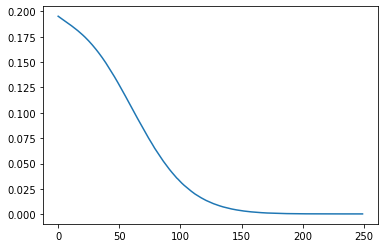

In [111]:
# checking cost distribution
plt.plot(history.epoch, history.history['loss'])

In [112]:
df['y_pred'] = recommender.predict([u_id, m_id])
df

32/32 [==============================] - 0s 2ms/step


,movie_id,user_id,rating,average_rating,y_true,u_id,m_id,y_pred
485364,1247,84078,2.5,3.75,-1.25,288,193,-1.249388e+00
485141,1247,48461,5.0,3.75,1.25,170,193,1.249092e+00
602903,1500,1204,3.5,3.75,-0.25,1,231,-2.498340e-01
603676,1500,138066,4.0,3.75,0.25,455,231,2.491484e-01
989185,2710,68685,2.0,2.00,0.00,238,387,3.855551e-05
...,...,...,...,...,...,...,...,...
1494955,5782,170504,4.0,4.00,0.00,567,595,-4.834263e-06
1162319,3358,59164,4.0,4.00,0.00,207,459,1.166472e-04
1904655,122882,190449,4.0,4.00,0.00,631,768,4.678543e-07
1823672,63859,15209,2.5,2.50,0.00,58,729,2.012714e-04


In [113]:
u_id = 1

_df = df[['movie_id', 'm_id']].drop_duplicates()

movies = df['m_id'].unique().reshape(-1, 1)
users = np.tile(np.array([u_id]), len(movies)).reshape(-1, 1)

user_predictions = recommender.predict([users, movies])
_df['user_predictions'] = user_predictions
_df['u_id'] = u_id
_df = _df.sort_values(by='user_predictions', ascending=False) \
    .merge(dfMovies, left_on='movie_id', right_index=True, how='left') \
    .merge(df[['movie_id', 'u_id', 'rating']], on=['movie_id', 'u_id'], how='left') \
    .merge(df[['movie_id', 'average_rating']].drop_duplicates(), on='movie_id', how='inner')

_df['user_predictions'] += _df['average_rating']
_df

25/25 [==============================] - 0s 1ms/step


,movie_id,m_id,user_predictions,u_id,title,year,genres,rating,average_rating
0,2340,338,3.998935,1,meet joe black,1998,{romance},4.0,3.000
1,1645,250,3.172467,1,"devil's advocate, the",1997,"{mystery, thriller, drama}",NaN,2.750
2,5010,572,3.654533,1,black hawk down,2001,"{war, drama, action}",NaN,3.250
3,1237,191,3.383559,1,"seventh seal, the (sjunde inseglet, det)",1957,{drama},NaN,3.000
4,4262,538,4.371959,1,scarface,1983,"{action, drama, crime}",NaN,4.000
...,...,...,...,...,...,...,...,...,...
764,1580,240,3.000479,1,men in black (a.k.a. mib),1997,"{action, sci-fi, comedy}",NaN,3.375
765,2289,329,3.608303,1,"player, the",1992,"{comedy, drama, crime}",NaN,4.000
766,3157,438,3.571403,1,stuart little,1999,"{children, fantasy, comedy}",NaN,4.000
767,333,58,2.531289,1,tommy boy,1995,{comedy},NaN,3.000


In [114]:
# other way to find similar movies - using keras lib

for i, la in enumerate(recommender.layers):
    print(i, la.name)

0 user_id_input
1 movie_id_input
2 user_vector_embedding
3 movie_vector_embedding
4 reshape_1
5 reshape_2
6 dot_1


In [115]:
movie_vectors = recommender.layers[3].get_weights()[0]
movie_vectors

array([[-1.5749821e-01,  1.3367334e-01, -1.5556239e-01, ...,
         1.8196213e-01, -1.8818584e-01, -8.4588103e-02],
       [-5.6547332e-03, -2.3215771e-02, -3.2981872e-03, ...,
        -7.4556656e-04,  5.7852236e-03, -6.4130146e-03],
       [-3.2993725e-03, -1.8255143e-04, -2.6402120e-03, ...,
        -1.1037379e-03, -5.0089532e-03, -3.6468236e-03],
       ...,
       [ 5.0809793e-02, -1.5544376e-01,  5.9061259e-02, ...,
         5.0738085e-02,  1.8779802e-01, -2.1467395e-01],
       [ 3.1488282e-03, -1.0612496e-03,  1.9446862e-03, ...,
        -1.6466467e-04,  8.1680535e-04,  7.0037204e-04],
       [ 1.3052965e-04, -1.0385302e-02,  3.0334332e-04, ...,
         2.4203567e-03, -1.8532423e-03,  7.9349498e-04]], dtype=float32)

In [116]:
movie_vectors = pd.DataFrame(movie_vectors, index=df['m_id'].unique())
movie_vectors = movie_vectors.merge(df[['m_id', 'movie_id']].drop_duplicates(), left_index=True, right_on='m_id') \
    .set_index('movie_id') \
    .drop(columns=['m_id']) \
    .join(dfMovies['title']) \
    .set_index('title')

movie_vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
title,,,,,,,,,,,,,,,,,,,,
"graduate, the",-0.157498,0.133673,-0.155562,0.137615,-0.121273,-0.028970,-0.068464,-0.208715,0.117343,-0.124698,0.126294,-0.096221,0.098984,-0.097110,0.017507,0.147522,-0.164809,0.181962,-0.188186,-0.084588
grosse pointe blank,-0.005655,-0.023216,-0.003298,-0.029896,-0.024202,0.000050,0.002721,-0.031332,-0.007498,0.003516,-0.015118,-0.027444,-0.024205,-0.012404,-0.000466,-0.003597,-0.018112,-0.000746,0.005785,-0.006413
"blair witch project, the",-0.003299,-0.000183,-0.002640,0.011986,0.001445,0.004453,0.000777,0.002032,0.016204,-0.000853,0.000672,0.004873,-0.007094,0.002398,0.000641,-0.002472,-0.002500,-0.001104,-0.005009,-0.003647
stuart little,0.000587,0.001953,0.002630,0.002977,0.002442,0.001705,-0.000581,-0.000614,0.003458,-0.000650,0.000078,0.000806,0.003668,0.000504,-0.002144,-0.001144,0.000766,-0.001170,-0.000152,0.001350
brassed off,0.000054,-0.000521,-0.001235,-0.000206,-0.000420,0.000156,-0.000965,-0.002261,0.000502,-0.001008,0.000683,-0.000672,0.001151,0.000044,-0.002657,-0.000856,-0.003077,-0.001148,0.001435,0.002420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"professional, the (le professionnel)",0.001548,-0.001997,-0.000994,-0.000384,-0.000606,0.004127,0.002826,-0.002649,0.000305,-0.008891,0.000292,-0.000011,-0.001191,-0.000664,-0.003589,0.006124,-0.000129,-0.001969,-0.001641,-0.012562
defending your life,0.019345,-0.005212,-0.000969,0.006257,0.011434,-0.005831,0.000701,-0.007607,0.001139,0.011638,-0.006447,0.001691,-0.004402,-0.000091,0.012034,0.005350,0.004167,0.000992,-0.005899,0.001340
mad max: fury road,0.050810,-0.155444,0.059061,0.118368,-0.198903,0.136195,-0.234547,0.141369,-0.199213,0.214398,-0.200121,-0.253130,-0.189115,0.104767,0.151886,0.216999,0.219421,0.050738,0.187798,-0.214674


In [117]:
title = 'toy story'

movie_vector = movie_vectors.loc[title].to_numpy().reshape(1, -1)
scores = cosine_similarity(movie_vector, movie_vectors.to_numpy())
key = f'similarity_to {title}'
similarity = pd.DataFrame(scores.reshape(-1, 1), index=movie_vectors.index, columns=[key])
similarity.sort_values(by=key, ascending=False)

,similarity_to toy story
title,
toy story,1.000000
two weeks notice,0.636800
almost famous,0.629534
"perfect world, a",0.556301
naked gun 33 1/3: the final insult,0.528528
...,...
sphere,-0.561688
"shining, the",-0.563381
stargate,-0.593661


# Recommendation engine - improvements, engine training

In [118]:
import numpy as np
import pandas as pd

from tensorflow import keras as ks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

from matplotlib import pyplot as plt

In [119]:
dfMovies = pd.read_pickle('data/movies.pkl')
df = pd.read_pickle('data/user-movie-data-clean.pkl')
print(df.shape)
df.head()

(1905979, 3)


,movie_id,user_id,rating
0,1,17,5.0
1,1,106,2.5
2,1,373,4.0
3,1,670,5.0
4,1,707,4.0


In [120]:
mu = df[['movie_id', 'rating']].groupby(by='movie_id').mean().rename(columns={'rating': 'mean_rating'})
df = df.merge(mu, left_on='movie_id', right_index=True)
df['y_true'] = df['rating'] - df['mean_rating']
df

,movie_id,user_id,rating,mean_rating,y_true
0,1,17,5.0,3.885476,1.114524
1,1,106,2.5,3.885476,-1.385476
2,1,373,4.0,3.885476,0.114524
3,1,670,5.0,3.885476,1.114524
4,1,707,4.0,3.885476,0.114524
...,...,...,...,...,...
1905974,134853,244116,4.5,3.884740,0.615260
1905975,134853,244606,3.0,3.884740,-0.884740
1905976,134853,246481,4.0,3.884740,0.115260
1905977,134853,246533,2.5,3.884740,-1.384740


In [121]:
# create training and test sets

df_train, df_test = train_test_split(df, test_size=0.1)

df_train = df_train.reset_index(drop='index')
df_test = df_test.reset_index(drop='index')

user_encoder = LabelEncoder().fit(df['user_id'])
movie_encoder = LabelEncoder().fit(df['movie_id'])

df_train['u_id'] = user_encoder.transform(df_train['user_id'])
df_train['m_id'] = movie_encoder.transform(df_train['movie_id'])
df_test['u_id'] = user_encoder.transform(df_test['user_id'])
df_test['m_id'] = movie_encoder.transform(df_test['movie_id'])

df_train

,movie_id,user_id,rating,mean_rating,y_true,u_id,m_id
0,2671,49324,4.0,3.268138,0.731862,432,1100
1,34405,38939,4.5,3.741715,0.758285,336,1913
2,5574,134015,3.0,3.057023,-0.057023,1149,1668
3,8464,173941,4.0,3.567440,0.432560,1499,1835
4,349,23815,2.5,3.312214,-0.812214,222,194
...,...,...,...,...,...,...,...
1715376,1371,47160,3.5,2.931712,0.568288,403,647
1715377,2291,243755,3.5,3.703642,-0.203642,2071,959
1715378,6377,216818,4.0,3.864495,0.135505,1861,1727
1715379,3578,240694,4.0,3.738513,0.261487,2045,1380


In [122]:
# building the model

N_FEATURES = 50
L2 = 1e-6
LR = 1e-3

def get_recommender(df_train):
    n_users = len(df_train['u_id'].unique())
    n_movies = len(df_train['m_id'].unique())
    
    users_ids = ks.layers.Input(shape=(1,), name='user_id_input')
    users_features = ks.layers.Embedding(
        n_users,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='user_vector_embedding'
    )(users_ids)
    users_features = ks.layers.Reshape((N_FEATURES,), name='reshape_1')(users_features)
    
    movies_ids = ks.layers.Input(shape=(1,), name='movie_id_input')
    movies_features = ks.layers.Embedding(
        n_movies,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='movie_vector_embedding'
    )(movies_ids)
    movies_features = ks.layers.Reshape((N_FEATURES,), name='reshape_2')(movies_features)
    
    prediction = ks.layers.Dot(axes=1)([users_features, movies_features])
    
    model = ks.models.Model(inputs=[users_ids, movies_ids], outputs=prediction)
    model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(learning_rate=LR))
    
    return model

In [123]:
ks.backend.clear_session()

recommender = get_recommender(df_train)
recommender.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 movie_id_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_vector_embedding (Embeddi  (None, 1, 50)       105450      ['user_id_input[0][0]']          
 ng)                                                                                              
                                                                                                  
 movie_vector_embedding (Embedd  (None, 1, 50)       110850      ['movie_id_input[0][0]']     

In [124]:
u_id = df_train['u_id'].to_numpy().reshape(-1, 1)
m_id = df_train['m_id'].to_numpy().reshape(-1, 1)
y_true = df_train['y_true'].to_numpy().reshape(-1, 1)

u_id_test = df_test['u_id'].to_numpy().reshape(-1, 1)
m_id_test = df_test['m_id'].to_numpy().reshape(-1, 1)
y_true_test = df_test['y_true'].to_numpy().reshape(-1, 1)


recommender = get_recommender(df_train)

history = recommender.fit(
    x=[u_id, m_id],
    y=y_true,
    validation_data=[[u_id_test, m_id_test], y_true_test],
    batch_size=512,
    epochs=15,
    verbose=1
)

Epoch 1/15
3351/3351 [==============================] - 15s 4ms/step - loss: 0.6777 - val_loss: 0.5884
Epoch 2/15
3351/3351 [==============================] - 13s 4ms/step - loss: 0.5553 - val_loss: 0.5482
Epoch 3/15
3351/3351 [==============================] - 13s 4ms/step - loss: 0.5142 - val_loss: 0.5335
Epoch 4/15
3351/3351 [==============================] - 13s 4ms/step - loss: 0.4861 - val_loss: 0.5288
Epoch 5/15
3351/3351 [==============================] - 13s 4ms/step - loss: 0.4652 - val_loss: 0.5297
Epoch 6/15
3351/3351 [==============================] - 13s 4ms/step - loss: 0.4506 - val_loss: 0.5340
Epoch 7/15
3351/3351 [==============================] - 13s 4ms/step - loss: 0.4411 - val_loss: 0.5388
Epoch 8/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.4348 - val_loss: 0.5431
Epoch 9/15
3351/3351 [==============================] - 15s 4ms/step - loss: 0.4306 - val_loss: 0.5462
Epoch 10/15
3351/3351 [==============================] - 13s 4ms/step - l

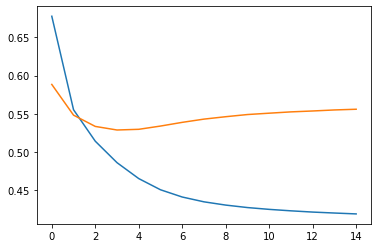

In [125]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [126]:
#Improvements 1st approach
N_FEATURES = 50
L2 = 1e-6
LR = 1e-3

def get_recommender(df_train):
    n_users = len(df_train['u_id'].unique())
    n_movies = len(df_train['m_id'].unique())
    
    users_ids = ks.layers.Input(shape=(1,), name='user_id_input')
    users_features = ks.layers.Embedding(
        n_users,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='user_vector_embedding'
    )(users_ids)
    users_features = ks.layers.Reshape((N_FEATURES,), name='reshape_user_X')(users_features)
    
    users_bias = ks.layers.Embedding(
        n_users,
        1,
        name='user_bias_embedding'
    )(users_ids)
    
    users_bias = ks.layers.Reshape((1,), name='reshape_user_X0')(users_bias)
    
    
    movies_ids = ks.layers.Input(shape=(1,), name='movie_id_input')
    movies_features = ks.layers.Embedding(
        n_movies,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='movie_vector_embedding'
    )(movies_ids)
    movies_features = ks.layers.Reshape((N_FEATURES,), name='reshape_movies_X')(movies_features)
    
    movies_bias = ks.layers.Embedding(
        n_movies,
        1,
        name='movie_bias_embedding'
    )(movies_ids)
    
    movies_bias = ks.layers.Reshape((1,), name='reshape_movies_X0')(movies_bias)
    
    prediction = ks.layers.Dot(axes=1)([users_features, movies_features])
    prediction = ks.layers.Add(name='adding_bias')([prediction, users_bias, movies_bias ])
    
    model = ks.models.Model(inputs=[users_ids, movies_ids], outputs=prediction)
    model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(learning_rate=LR))
    
    return model

ks.backend.clear_session()

recommender = get_recommender(df_train)
recommender.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 movie_id_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_vector_embedding (Embeddi  (None, 1, 50)       105450      ['user_id_input[0][0]']          
 ng)                                                                                              
                                                                                                  
 movie_vector_embedding (Embedd  (None, 1, 50)       110850      ['movie_id_input[0][0]']     

In [127]:
u_id = df_train['u_id'].to_numpy().reshape(-1, 1)
m_id = df_train['m_id'].to_numpy().reshape(-1, 1)
y_true = df_train['y_true'].to_numpy().reshape(-1, 1)

u_id_test = df_test['u_id'].to_numpy().reshape(-1, 1)
m_id_test = df_test['m_id'].to_numpy().reshape(-1, 1)
y_true_test = df_test['y_true'].to_numpy().reshape(-1, 1)


recommender = get_recommender(df_train)

history = recommender.fit(
    x=[u_id, m_id],
    y=y_true,
    validation_data=[[u_id_test, m_id_test], y_true_test],
    batch_size=512,
    epochs=15,
    verbose=1
)

Epoch 1/15
3351/3351 [==============================] - 16s 4ms/step - loss: 0.6599 - val_loss: 0.5790
Epoch 2/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.5440 - val_loss: 0.5404
Epoch 3/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.5037 - val_loss: 0.5283
Epoch 4/15
3351/3351 [==============================] - 12s 4ms/step - loss: 0.4771 - val_loss: 0.5257
Epoch 5/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.4579 - val_loss: 0.5284
Epoch 6/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.4449 - val_loss: 0.5331
Epoch 7/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.4363 - val_loss: 0.5382
Epoch 8/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.4308 - val_loss: 0.5422
Epoch 9/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.4269 - val_loss: 0.5450
Epoch 10/15
3351/3351 [==============================] - 14s 4ms/step - l

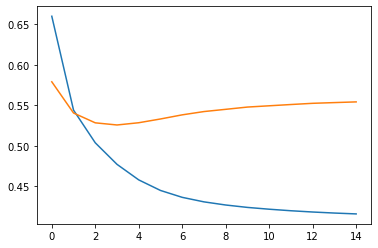

In [128]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [129]:
# Improvements - 2nd approach

N_FEATURES = 50
L2 = 1e-6
LR = 1e-3

def get_recommender(df_train):
    min_rating = 0.5
    max_rating = 5
    
    n_users = len(df_train['u_id'].unique())
    n_movies = len(df_train['m_id'].unique())
    
    users_ids = ks.layers.Input(shape=(1,), name='user_id_input')
    users_features = ks.layers.Embedding(
        n_users,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='user_vector_embedding'
    )(users_ids)
    users_features = ks.layers.Reshape((N_FEATURES,), name='reshape_user_X')(users_features)
    
    users_bias = ks.layers.Embedding(
        n_users,
        1,
        name='user_bias_embedding'
    )(users_ids)
    
    users_bias = ks.layers.Reshape((1,), name='reshape_user_X0')(users_bias)
    
    
    movies_ids = ks.layers.Input(shape=(1,), name='movie_id_input')
    movies_features = ks.layers.Embedding(
        n_movies,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='movie_vector_embedding'
    )(movies_ids)
    movies_features = ks.layers.Reshape((N_FEATURES,), name='reshape_movies_X')(movies_features)
    
    movies_bias = ks.layers.Embedding(
        n_movies,
        1,
        name='movie_bias_embedding'
    )(movies_ids)
    
    movies_bias = ks.layers.Reshape((1,), name='reshape_movies_X0')(movies_bias)
    
    prediction = ks.layers.Dot(axes=1)([users_features, movies_features])
    prediction = ks.layers.Add(name='adding_bias')([prediction, users_bias, movies_bias ])
    prediction = ks.layers.Activation(activation='sigmoid')(prediction)
    prediction = ks.layers.Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(prediction)
    
    
    model = ks.models.Model(inputs=[users_ids, movies_ids], outputs=prediction)
    model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(learning_rate=LR))
    
    return model

ks.backend.clear_session()

recommender = get_recommender(df_train)
recommender.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 movie_id_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_vector_embedding (Embeddi  (None, 1, 50)       105450      ['user_id_input[0][0]']          
 ng)                                                                                              
                                                                                                  
 movie_vector_embedding (Embedd  (None, 1, 50)       110850      ['movie_id_input[0][0]']     

In [130]:
u_id = df_train['u_id'].to_numpy().reshape(-1, 1)
m_id = df_train['m_id'].to_numpy().reshape(-1, 1)
y_true = df_train['rating'].to_numpy().reshape(-1, 1)

u_id_test = df_test['u_id'].to_numpy().reshape(-1, 1)
m_id_test = df_test['m_id'].to_numpy().reshape(-1, 1)
y_true_test = df_test['rating'].to_numpy().reshape(-1, 1)


recommender = get_recommender(df_train)

history = recommender.fit(
    x=[u_id, m_id],
    y=y_true,
    validation_data=[[u_id_test, m_id_test], y_true_test],
    batch_size=512,
    epochs=15,
    verbose=1
)

Epoch 1/15
3351/3351 [==============================] - 16s 4ms/step - loss: 0.7451 - val_loss: 0.5973
Epoch 2/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.5652 - val_loss: 0.5543
Epoch 3/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.5211 - val_loss: 0.5360
Epoch 4/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.4919 - val_loss: 0.5292
Epoch 5/15
3351/3351 [==============================] - 13s 4ms/step - loss: 0.4692 - val_loss: 0.5291
Epoch 6/15
3351/3351 [==============================] - 13s 4ms/step - loss: 0.4523 - val_loss: 0.5328
Epoch 7/15
3351/3351 [==============================] - 13s 4ms/step - loss: 0.4404 - val_loss: 0.5378
Epoch 8/15
3351/3351 [==============================] - 13s 4ms/step - loss: 0.4323 - val_loss: 0.5426
Epoch 9/15
3351/3351 [==============================] - 14s 4ms/step - loss: 0.4265 - val_loss: 0.5470
Epoch 10/15
3351/3351 [==============================] - 15s 4ms/step - l

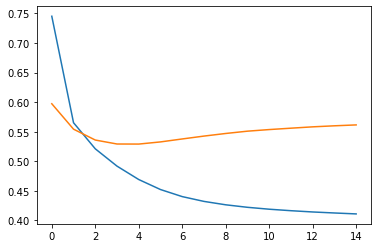

In [131]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [132]:
u_id = 1
_df = df_train.copy()
movies_watched = _df[_df['u_id'] == u_id][['m_id', 'movie_id']].drop_duplicates().set_index('movie_id')
movies_watched_ids = movies_watched['m_id'].to_numpy()
user_id_as_array = np.array([u_id] * len(movies_watched_ids))

movies_watched['estimated_rating'] = recommender.predict([
    user_id_as_array,
    movies_watched_ids
])

18/18 [==============================] - 0s 2ms/step


In [133]:
movies_watched['u_id'] = u_id
movies_watched.merge(_df[['movie_id', 'm_id', 'u_id', 'rating']].reset_index(), on=['m_id', 'u_id']) \
.merge(dfMovies, left_on='movie_id', right_index=True) \
.sort_values(by='estimated_rating', ascending=False)[['estimated_rating', 'rating', 'title', 'year', 'genres']]

,estimated_rating,rating,title,year,genres
447,4.670933,4.0,"big lebowski, the",1998,"{comedy, crime}"
479,4.591610,3.5,pulp fiction,1994,"{comedy, thriller, drama, crime}"
314,4.565269,4.5,fight club,1999,"{action, thriller, drama, crime}"
145,4.521527,5.0,fargo,1996,"{comedy, thriller, drama, crime}"
100,4.450904,4.5,inglourious basterds,2009,"{war, drama, action}"
...,...,...,...,...,...
245,1.317698,1.0,police academy 5: assignment: miami beach,1988,"{comedy, crime}"
441,1.296130,0.5,wild wild west,1999,"{action, western, comedy, sci-fi}"
368,1.279413,0.5,"stepford wives, the",2004,"{thriller, fantasy, comedy}"
363,1.224659,1.5,van helsing,2004,"{action, adventure, fantasy, horror}"


In [134]:
movies_not_watched = _df[~_df['movie_id'].isin(movies_watched.index.tolist())][['m_id','movie_id']].drop_duplicates() \
.set_index('movie_id')

movies_not_watched_ids = movies_not_watched['m_id'].to_numpy()
user_id_as_array = np.array([u_id] * len(movies_not_watched_ids))
movies_not_watched['estimated_rating'] = recommender.predict([
    user_id_as_array,
    movies_not_watched_ids
])

movies_not_watched.join(dfMovies) \
.sort_values(by='estimated_rating', ascending=False)[['estimated_rating', 'title', 'year', 'genres']]

53/53 [==============================] - 0s 2ms/step


,estimated_rating,title,year,genres
movie_id,,,,
1237,4.493963,"seventh seal, the (sjunde inseglet, det)",1957,{drama}
3386,4.432802,jfk,1991,"{mystery, thriller, drama}"
750,4.413253,dr. strangelove or: how i learned to stop worr...,1964,"{war, comedy}"
47,4.412045,seven (a.k.a. se7en),1995,"{mystery, thriller}"
953,4.391456,it's a wonderful life,1946,"{romance, fantasy, drama}"
...,...,...,...,...
51077,1.141074,ghost rider,2007,"{thriller, fantasy, action}"
3825,1.125466,coyote ugly,2000,"{romance, drama, comedy}"
810,1.124294,kazaam,1996,"{children, fantasy, comedy}"


In [135]:
for i, la in enumerate(recommender.layers):
    print(i, la.name)

0 user_id_input
1 movie_id_input
2 user_vector_embedding
3 movie_vector_embedding
4 reshape_user_X
5 reshape_movies_X
6 user_bias_embedding
7 movie_bias_embedding
8 dot_1
9 reshape_user_X0
10 reshape_movies_X0
11 adding_bias
12 activation_1
13 lambda_1


In [136]:
movie_vectors = recommender.layers[3].get_weights()[0]
movie_vectors.shape

(2217, 50)

In [137]:
pd.DataFrame(movie_vectors, index=range(m_id.min(), m_id.max() + 1))

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.201071,-0.304590,-0.302087,0.180623,-0.622626,-0.019487,-0.036010,0.214198,-0.124335,-0.328770,...,-0.011087,0.024801,0.009459,0.286429,0.573413,-0.602379,0.086561,-0.235978,0.435786,-0.110826
1,0.016454,-0.104717,-0.142095,0.072818,0.437858,-0.095637,-0.201527,0.213747,0.228874,-0.055741,...,0.224296,0.040264,0.101915,-0.104999,-0.040023,-0.053006,0.158533,-0.187498,0.145168,-0.115204
2,0.264198,0.257508,-0.160657,-0.190731,-0.026277,0.009460,0.209768,0.019793,0.127859,0.034240,...,-0.190093,-0.380602,0.160958,-0.201188,-0.058236,0.376290,0.078170,0.122922,0.393484,-0.463300
3,0.265370,-0.210501,0.030567,0.136291,0.247288,0.457655,-0.291937,0.239728,-0.114398,-0.277543,...,0.098145,-0.023388,0.025028,-0.183875,-0.107659,-0.041794,0.298369,-0.157501,0.354476,0.744027
4,0.159991,0.306380,-0.073131,-0.194806,0.282901,-0.015480,-0.218701,-0.117521,0.148246,-0.246642,...,-0.139290,-0.024359,0.301898,-0.327184,-0.085797,0.043821,-0.087228,0.030157,0.311104,-0.265948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,-0.276459,-0.590371,-0.423051,0.173515,0.335482,0.257063,0.804625,-0.463621,0.079212,0.139562,...,-0.297978,-0.258580,0.352393,0.541637,0.033504,-0.482993,-0.071070,0.068528,0.240354,-0.059788
2213,-0.293379,-0.331451,0.197115,0.308040,0.130964,0.099974,0.423086,0.056805,0.026030,-0.539826,...,-0.194334,-0.051160,0.487038,0.015954,0.226165,-0.053517,-0.152095,0.355314,0.083077,0.127909
2214,-0.141888,-0.323833,0.267583,-0.326451,-0.022686,-0.175812,0.389005,-0.302232,0.314435,-0.306433,...,0.091112,-0.055973,-0.233858,-0.247753,0.399465,0.226873,-0.685628,0.031384,0.297306,-0.122935
2215,-0.424217,-0.448164,-0.163056,-0.126901,0.175901,0.225749,-0.020476,0.046986,-0.041194,0.047470,...,-0.146810,0.051795,-0.137106,-0.243089,-0.026100,0.056474,0.339209,0.116704,0.340421,0.514462


In [138]:
_df = df.copy()

df_movie_vectors = pd.DataFrame(movie_vectors, index=range(m_id.min(), m_id.max() + 1))
_df['m_id'] = movie_encoder.transform(_df['movie_id'])
_df = _df.set_index('movie_id')
_df = _df[['m_id']].drop_duplicates()
_df = _df.join(dfMovies).set_index('m_id')

_df

,title,year,genres
m_id,,,
0,toy story,1995,"{fantasy, animation, children, comedy, adventure}"
1,jumanji,1995,"{children, fantasy, adventure}"
2,grumpier old men,1995,"{romance, comedy}"
3,waiting to exhale,1995,"{romance, drama, comedy}"
4,father of the bride part ii,1995,{comedy}
...,...,...,...
2212,mad max: fury road,2015,"{action, sci-fi, adventure, thriller}"
2213,star wars: episode vii - the force awakens,2015,"{action, sci-fi, fantasy, adventure}"
2214,avengers: age of ultron,2015,"{sci-fi, adventure, action}"


In [139]:
df_movies_vectors = pd.DataFrame(movie_vectors, index=range(m_id.min(), m_id.max() + 1))
title_pick = 'toy story'
pick_id = _df[_df['title'] == title_pick]
pick_id.index.values

array([0], dtype=int64)

In [140]:
df_movies_vectors.loc[pick_id.index.values]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.201071,-0.30459,-0.302087,0.180623,-0.622626,-0.019487,-0.03601,0.214198,-0.124335,-0.32877,...,-0.011087,0.024801,0.009459,0.286429,0.573413,-0.602379,0.086561,-0.235978,0.435786,-0.110826


In [141]:
cosine_similarity(movie_vectors, movie_vectors[pick_id.index.values])

array([[1.        ],
       [0.3524174 ],
       [0.0409979 ],
       ...,
       [0.19339335],
       [0.14151484],
       [0.53002024]], dtype=float32)

In [142]:
_df[f'similarity to: {title_pick}'] = cosine_similarity(movie_vectors, movie_vectors[pick_id.index.values])

In [143]:
_df.sort_values(by=f'similarity to: {title_pick}', ascending=False)

,title,year,genres,similarity to: toy story
m_id,,,,
0,toy story,1995,"{fantasy, animation, children, comedy, adventure}",1.000000
1254,toy story 2,1999,"{fantasy, animation, children, comedy, adventure}",0.884965
1727,finding nemo,2003,"{children, animation, adventure, comedy}",0.851150
986,"bug's life, a",1998,"{children, animation, adventure, comedy}",0.798958
1593,"monsters, inc.",2001,"{fantasy, animation, children, comedy, adventure}",0.775807
...,...,...,...,...
49,lawnmower man 2: beyond cyberspace,1996,"{action, sci-fi, thriller}",-0.362727
1162,"astronaut's wife, the",1999,"{horror, sci-fi, thriller}",-0.371063
961,"night at the roxbury, a",1998,{comedy},-0.373554


In [144]:
df_movies_vectors = pd.DataFrame(movie_vectors, index=range(m_id.min(), m_id.max() + 1))

title_pick = 'star wars: episode iv - a new hope'
pick_id = _df[_df['title'] == title_pick]
pick_id.index.values

_df[f'similarity to: {title_pick}'] = cosine_similarity(movie_vectors, movie_vectors[pick_id.index.values])
_df.sort_values(by=f'similarity to: {title_pick}', ascending=False)

,title,year,genres,similarity to: toy story,similarity to: star wars: episode iv - a new hope
m_id,,,,,
149,star wars: episode iv - a new hope,1977,"{sci-fi, adventure, action}",0.352732,1.000000
520,star wars: episode v - the empire strikes back,1980,"{sci-fi, adventure, action}",0.387839,0.935741
532,star wars: episode vi - return of the jedi,1983,"{sci-fi, adventure, action}",0.271390,0.902241
522,raiders of the lost ark (indiana jones and the...,1981,"{adventure, action}",0.477551,0.740681
1903,star wars: episode iii - revenge of the sith,2005,"{sci-fi, adventure, action}",0.194131,0.649908
...,...,...,...,...,...
185,village of the damned,1995,"{sci-fi, horror}",-0.350217,-0.340333
1162,"astronaut's wife, the",1999,"{horror, sci-fi, thriller}",-0.371063,-0.346142
55,"juror, the",1996,"{thriller, drama}",-0.268631,-0.383856
